In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(100)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib as mpl
mpl.rcParams['figure.facecolor'] = (1,1,1,1)

In [3]:
pd.read_csv('../summary/uninfected_rep1/virus.counts.final.tsv', sep='\t')

,virus,num_hit,rate_hit
0,NC_022518.1_Human_endogenous_retrovirus_K113_c...,5809,0.000053


In [4]:
list_time = ['uninfected', 'one', 'three', 'five']
list_time_col = ['uninfected', '1h', '3h', '5h']
list_rep = ['rep1', 'rep2']

for time, time_col in zip(list_time, list_time_col):
    for rep in list_rep:
        sample = time + "_" + rep
        d = pd.read_csv('../summary/{}/virus.counts.final.tsv'.format(
                            sample), sep='\t')
        d = d[['virus', 'num_hit']]
        d.columns = ['virus', time_col + ' ' + rep]

        if sample == "uninfected_rep1":
            df = d.copy()
        else:
            df = pd.merge(df, d, how='outer')
df = df.fillna(0)
df.index = df['virus']
df = df.drop(columns=['virus'])

In [6]:
df = df.sort_values(by="5h rep1", ascending=False)

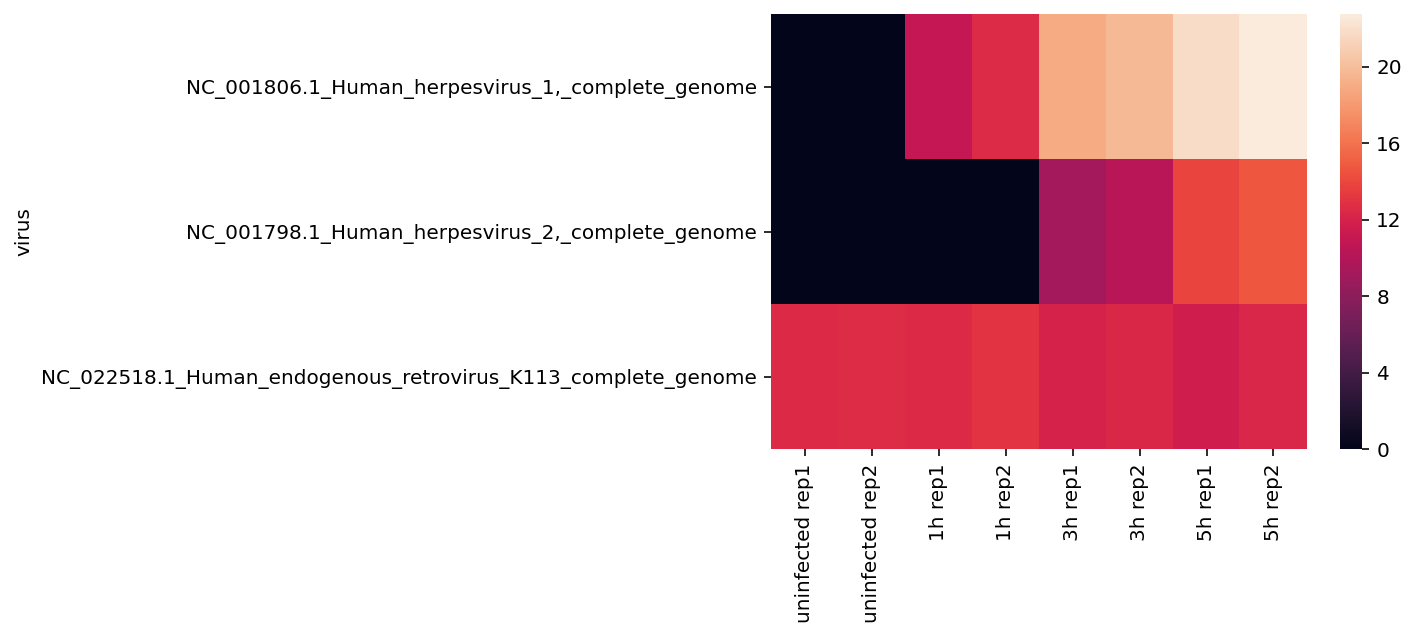

In [7]:
sns.heatmap(np.log2(df + 1))
plt.savefig('img_yy/heatmap_VIRTUS.pdf', bbox_inches='tight')